# Embedding a 2D circle with t-SNE and UMAP and various initializations

In [18]:
import numpy as np
import pylab as plt
import seaborn as sns
sns.set(context='paper', style='ticks', font='Arial')

from openTSNE import TSNE
# from umap import UMAP

import openTSNE, umap
print('openTSNE', openTSNE.__version__)
# print('umap', umap.__version__)

openTSNE 0.6.2


In [19]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [21]:
np.save("C:/Users/pchourasia1/Desktop/tSne_extension/circle/tSne_circle_data.npy",X)

In [22]:
import pandas as pd 
pd.DataFrame(X).to_csv("C:/Users/pchourasia1/Desktop/tSne_extension/circle/tSne_circle_data.csv")

In [13]:
X_init = np.random.randn(n,2) / 1000

In [15]:

# # BH is faster for this sample size
# Z1 = TSNE(n_jobs=-1, initialization= X_init, random_state=42, negative_gradient_method='bh').fit(X)
# # Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

In [12]:
# # %%time

# Z3 = UMAP(init='random', random_state=42).fit_transform(X)
# Z4 = UMAP().fit_transform(X)

In [55]:
from numpy import genfromtxt
Z1 = genfromtxt('C:/Users/pchourasia1/Desktop/tSne_extension/tSNE_matrix_random/circle/Isolation/isolation_tsne_kmer_matlab_2d_2000_.csv', delimiter=',')
Z2 = genfromtxt('C:/Users/pchourasia1/Desktop/tSne_extension/tSNE_matrix_pca/circle/Gaussian/gaussian_tsne_kmer_matlab_2d_2000_.csv', delimiter=',')
Z3 = genfromtxt('C:/Users/pchourasia1/Desktop/tSne_extension/tSNE_matrix_ica/circle/Gaussian/gaussian_tsne_kmer_matlab_2d_2000_.csv', delimiter=',')
Z4 = genfromtxt('C:/Users/pchourasia1/Desktop/tSne_extension/tSNE_matrix_ensemble/circle/Gaussian/gaussian_tsne_kmer_matlab_2d_2000_.csv', delimiter=',')

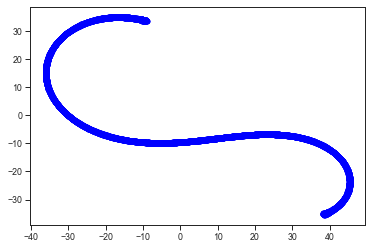

In [56]:
import matplotlib.pyplot as plt
 
 
x =Z1[:,0]
 
y =Z1[:,1]
 
plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

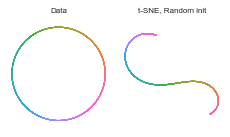

In [34]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, Random init', 't-SNE, PCA init', 
          't-SNE, ICA init', 't-SNE, Ensemble']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X,Z1],1):
    plt.subplot(1,5,i)
    plt.gca().set_aspect('equal', adjustable='dat0alim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('tsne-umap-circle.png', dpi=600)
plt.savefig('tsne-umap-circle.pdf', dpi=600)